In [1]:
import matplotlib.pyplot as plt
# inline or widget
%matplotlib inline

from hrixs_data import HrixsData

Cupy is not installed in this environment, no access to the GPU


In [2]:
run_number = 213
hd = HrixsData.get_run(run_number)

## Images
Basic images of the runs

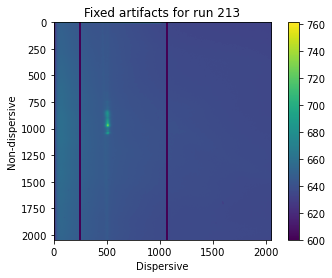

In [9]:
plt.imshow(hd.mean, vmin=600)
plt.xlabel("Dispersive")
plt.ylabel("Non-dispersive")
plt.title(f"Fixed artifacts for run {hd.run_number}")
plt.colorbar()

Text(0.5, 1.0, 'Region of interest for run 213')

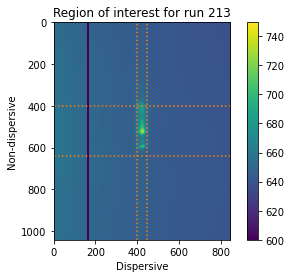

In [10]:
plt.imshow(hd.select_roi(hd.mean, radius=400), vmin=600)
plt.colorbar()

x_offset = hd.select_roi(hd.roi, radius=400).x.min()
y_offset = hd.select_roi(hd.roi, radius=400).y.min()

plt.axhline(hd.select_roi(hd.roi).x.min()-x_offset, color="tab:orange", ls=":")
plt.axhline(hd.select_roi(hd.roi).x.max()-x_offset, color="tab:orange", ls=":")
plt.axvline(hd.select_roi(hd.roi).y.min()-y_offset, color="tab:orange", ls=":")
plt.axvline(hd.select_roi(hd.roi).y.max()-y_offset, color="tab:orange", ls=":")
plt.xlabel("Dispersive")
plt.ylabel("Non-dispersive")
plt.title(f"Region of interest for run {hd.run_number}")

## Spectrum
Spectrum with deviation

Text(0, 0.5, 'Intensity [$\\frac{counts}{\\mu J}$]')

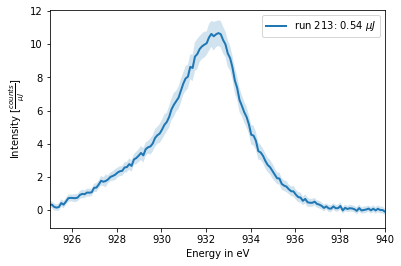

In [11]:
spectrum = hd.get_spectrum()
deviation = hd.get_spectrum_deviation()

plt.plot(spectrum.energy, spectrum, lw=2, label=f"run {hd.run_number}: ${hd.beam_intensity.values:.2f}\ \mu J$")
plt.fill_between(spectrum.energy, spectrum - deviation, spectrum + deviation, alpha=0.2)

plt.xlim((925, 940))
plt.legend()
plt.xlabel('Energy in eV')
plt.ylabel(r'Intensity [$\frac{counts}{\mu J}$]')